In [21]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")
import pandasql as psql

# display all the columns in the dataset
pd.set_option("display.max_columns",None)



In [48]:
#  read the file

churn=pd.read_csv(r"C:\Users\Dlc\Downloads\Churn_Modelling (3).csv",header=0)

# create a backup file

churn2=churn.copy()

In [23]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [50]:
# count the target or dependent variable by '0' & '1' and their proportion
# (>=10):1 the the data is inbalance data

# the ratio of the major class and minor class is >=10 then the data is inbalance data

Exited_count=churn.Exited.value_counts()
print("class 0",Exited_count[0])
print("class 1",Exited_count[1])
print("proportion:",round(Exited_count[0]/Exited_count[1],2),": 1")
print("Total bank records :",len(churn))

class 0 7963
class 1 2037
proportion: 3.91 : 1
Total bank records : 10000


In [51]:
churn1=churn[churn.duplicated(keep="first")]
churn1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [30]:
churn.duplicated().any()

False

In [52]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [53]:
churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [54]:
churn=churn.drop(['RowNumber','CustomerId','Surname'],axis=1)

#del churn["RowNumber"]
#del churn["CustomerId"]
#del churn["Surname"]

# display first five records

churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [56]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
churn.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [13]:
churn["Gender"]=churn["Gender"].str.replace("Male",'0')
churn['Gender']=churn['Gender'].str.replace("Female",'1')

In [14]:
churn['Gender'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int32

In [15]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [35]:
churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [57]:
#churn['Geography']=churn["Geography"].str.replace("France",'0')
#churn['Geography']=churn["Geography"].str.replace("Germany",'1')
#churn['Geography']=churn["Geography"].str.replace("Spain",'2')


churn["Geography"]=churn["Geography"].map({"Spain":0,"France":1,"Germany":2})
churn["Gender"]=churn["Gender"].map({"Male":0,"Female":1})

In [40]:
churn["Geography"].astype(int)


0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int32

In [58]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [59]:
IndepVar=[]
for col in churn.columns:
    if col != 'Exited':
        IndepVar.append(col)
TarVar='Exited'
x=churn[IndepVar]
y=churn[TarVar]

In [60]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,1,42,2,0.00,1,1,1,101348.88
1,608,0,1,41,1,83807.86,1,0,1,112542.58
2,502,1,1,42,8,159660.80,3,1,0,113931.57
3,699,1,1,39,1,0.00,2,0,0,93826.63
4,850,0,1,43,2,125510.82,1,1,1,79084.10


In [61]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [62]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [63]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

# fit_transform(). It will calculate the mean(μ)and standard deviation(σ) of the feature
#F at a time it will transform the data points of the feature F.
x_train=mmscaler.fit_transform(x_train)
#x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)

x_test=mmscaler.fit_transform(x_test)
#x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

In [64]:
# to build decision tree model

from sklearn.tree import DecisionTreeClassifier

#create an object for the dataset 

model=DecisionTreeClassifier()

# train the model with the train dataset

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob=model.predict_proba(x_test)

In [65]:
# to display the alorithm hyper parameters

params=model.get_params()
print(params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [66]:
# confusion matrix in metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual=y_test

# predicted values

predicted=y_pred

# confusion matrix

matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("confusion matrix :",matrix)

# outcome values order in sklearn

tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("outcome values:",tp,fn,fp,tn)

confusion matrix : [[ 300  321]
 [ 296 2083]]
outcome values: 300 321 296 2083


Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.48      0.49       621
           0       0.87      0.88      0.87      2379

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000

Accuracy : 79.4 %
Precision : 50.3 %
Recall : 48.3 %
F1 Score : 0.493
Specificity or True Negative Rate : 87.6 %
Balanced Accuracy : 68.0 %
MCC : 0.364
roc_auc_score: 0.679


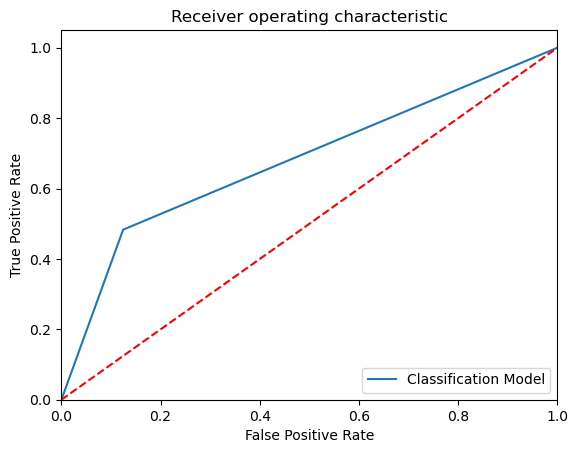

-----------------------------------------------------------------------------------------------------


In [67]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [68]:
Results = pd.DataFrame({'Exited_A':y_test, 'Exited_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = churn.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_A,Exited_P
6832,594,2,1,21,2,87096.82,2,1,0,168186.11,0,0,0
836,694,0,1,37,3,0.00,2,1,1,147012.22,0,0,0
6632,694,0,0,31,5,0.00,1,1,0,35593.18,0,0,0
6701,653,1,0,37,7,135847.47,1,1,0,144880.81,0,0,0
4064,626,2,0,39,10,132287.92,3,1,1,51467.92,1,1,1


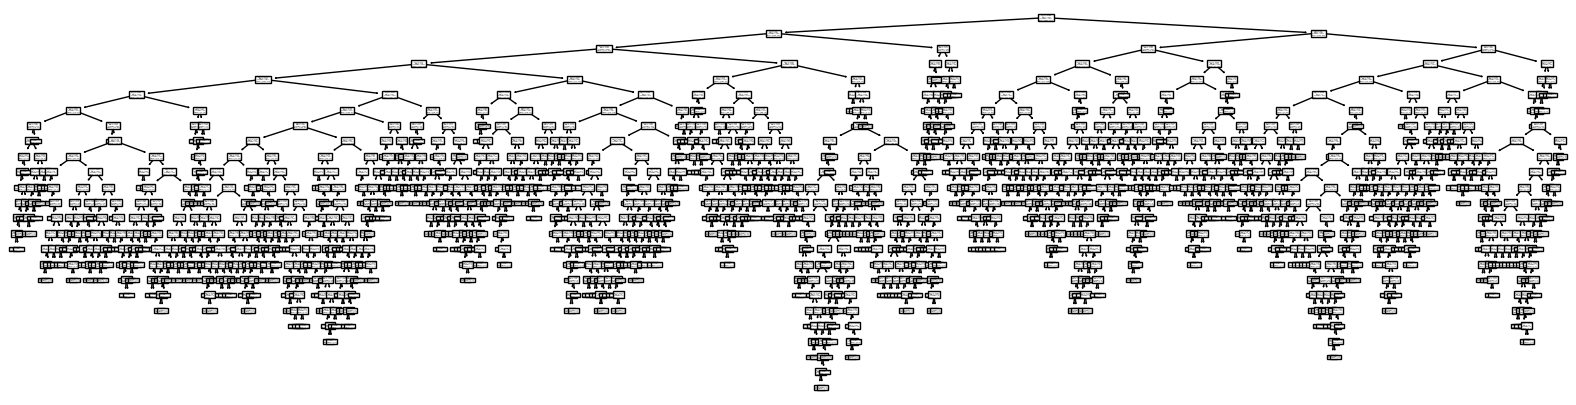

In [69]:
# plot the decision tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))

tree.plot_tree(model);